## 📚 Preparation

In [143]:
#importing necessary libraries
import math
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [144]:
xls = pd.ExcelFile("../data/pwt100.xlsx")
all_df = pd.read_excel(xls, "Data")

# 1. Trend Calculation

In [145]:
from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend

We clean the data before fitting time trends.

In [146]:
# Subset relevant columns and compute per capita real GDP
data = all_df.loc[:, ("country", "year", "rgdpna", "pop")] #use 2017 national prices
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]

# select your country as a country
data = data.loc[data["country"] == "Brazil", ("year", "rgdpna", "rgdpna_pc")]
# Reset the index (not crucial)
data.index = data["year"]

Ypc = data["rgdpna_pc"]
ypc = np.log(Ypc)

Y = data["rgdpna"]
y = np.log(Y)

# Compute sample size.
T = len(Y) # sample size used for regression

Next, we will compute four different specifications: (i) additive + linear (ii) additive + quadratic
(iii) exponential + linear and (iv) exponential + quadratic. We will use
`get_regression_coefs(y, x1, x2)` in Python to run our linear regressions.

### a) Linear Additive Model 📈

### GDP trend:

In [147]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [148]:
# Initialise predicted values Yhat
Yhat_add_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

/var/folders/g4/8ft2rrv13nb5qxqxxmh622pc0000gn/T/ipykernel_63107/3092062490.py:9: RuntimeWarning: invalid value encountered in log
  yhat_add_lin = np.log(Yhat_add_lin)


Now we proceed to plot the graph for the linear + additive model.

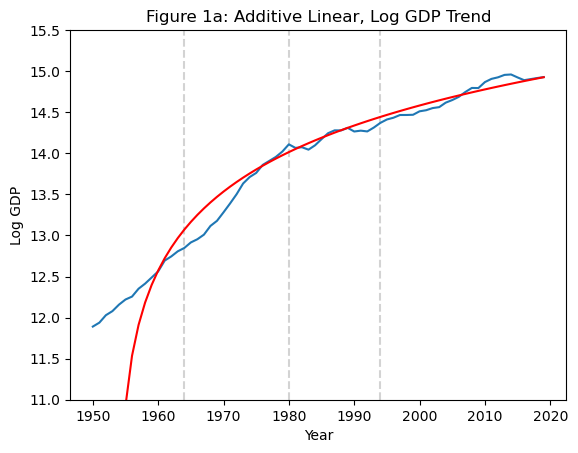

In [149]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_lin, color = 'red')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP")

#formatting
plt.title("Figure 1a: Additive Linear, Log GDP Trend")
plt.ylim(11,15.5)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 1a.png", dpi=300, bbox_inches='tight')

### GDP per capita trend:

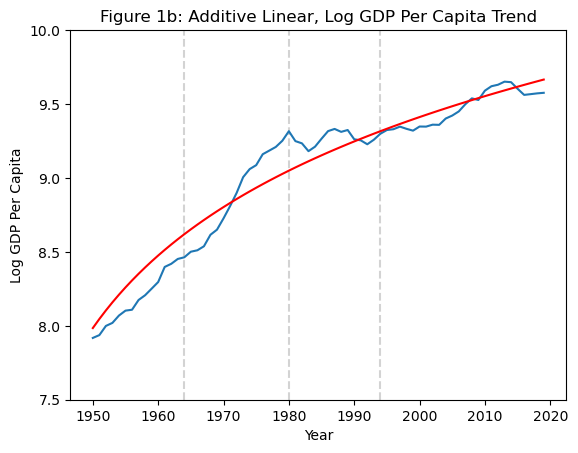

In [150]:
a_add_linpc, b_add_linpc = get_regression_coefs(Ypc, x1, x2)

# Initialise predicted values yhat
Yhat_add_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_linpc[t] = a_add_linpc + b_add_linpc * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_linpc = np.log(Yhat_add_linpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_linpc, color = 'red')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP Per Capita")

#formatting
plt.title("Figure 1b: Additive Linear, Log GDP Per Capita Trend")
plt.ylim(7.5,10)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 1b.png", dpi=300, bbox_inches='tight')

### b) Linear Quadratic Model 📈

In [151]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_add_quad, b_add_quad, c_add_quad = get_regression_coefs(Y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [152]:
# Initialise predicted values Yhat
Yhat_add_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quad[t] = a_add_quad + b_add_quad * (t + 1) + c_add_quad * (t+1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quad = np.log(Yhat_add_quad)

Now we proceed to plot the graph for the linear + quadratic model.

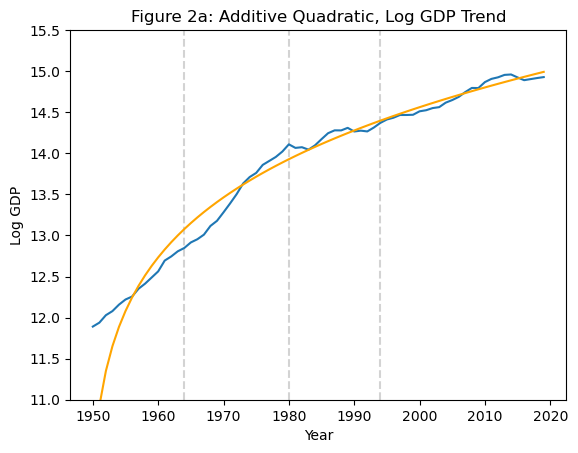

In [153]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_quad, color = 'orange')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP")

#formatting
plt.title("Figure 2a: Additive Quadratic, Log GDP Trend")
plt.ylim(11,15.5)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 2a.png", dpi=300, bbox_inches='tight')

### GDP per capita trend:

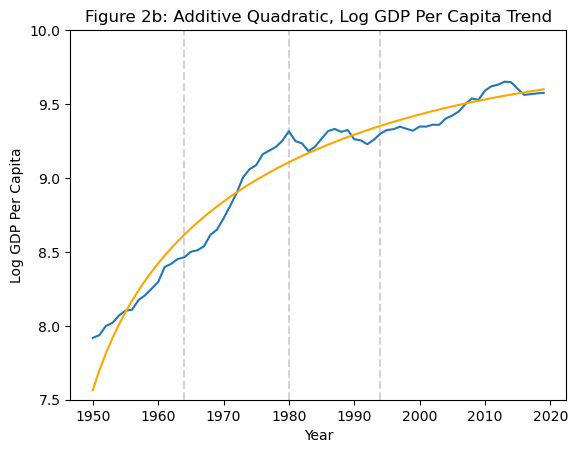

In [154]:
a_add_quadpc, b_add_quadpc, c_add_quadpc = get_regression_coefs(Ypc, x1, x2, x3)

# Initialise predicted values yhat
Yhat_add_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quadpc[t] = a_add_quadpc + b_add_quadpc * (t + 1) + c_add_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quadpc = np.log(Yhat_add_quadpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_quadpc, color = 'orange')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP Per Capita")

#formatting
plt.title("Figure 2b: Additive Quadratic, Log GDP Per Capita Trend")
plt.ylim(7.5,10)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 2b.png", dpi=300, bbox_inches='tight')

### c) Exponential Linear Model 📈

In [155]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_exp_lin, b_exp_lin = get_regression_coefs(y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [156]:
# Initialise predicted values Yhat
yhat_exp_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1) # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + linear model.

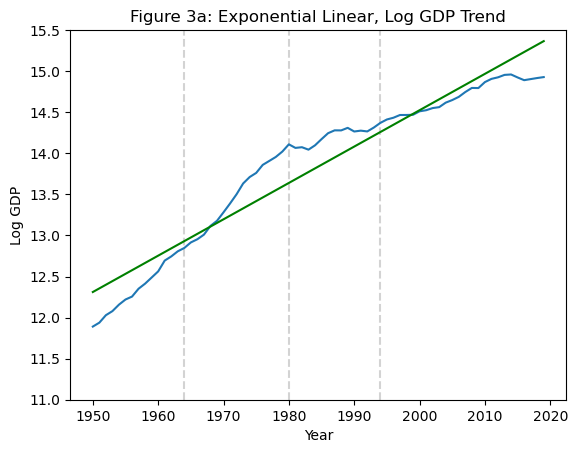

In [157]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_lin, color = 'green')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP")

#formatting
plt.title("Figure 3a: Exponential Linear, Log GDP Trend")
plt.ylim(11,15.5)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 3a.png", dpi=300, bbox_inches='tight')

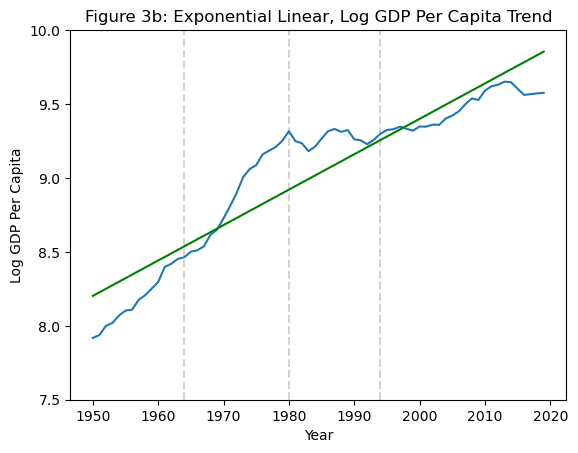

In [158]:
a_exp_linpc, b_exp_linpc = get_regression_coefs(ypc, x1, x2)

# Initialise predicted values yhat
yhat_exp_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_linpc[t] = a_exp_linpc + b_exp_linpc * (t + 1) # recall that Python indexing starts at 0

# No need to convert to log units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_linpc, color = 'green')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP Per Capita")

#formatting
plt.title("Figure 3b: Exponential Linear, Log GDP Per Capita Trend")
plt.ylim(7.5,10)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 3b.png", dpi=300, bbox_inches='tight')

### d) Exponential Quadratic Model 📈

In [159]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [160]:
# Initialise predicted values yhat
yhat_exp_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t+1)**2 # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + quadratic model.

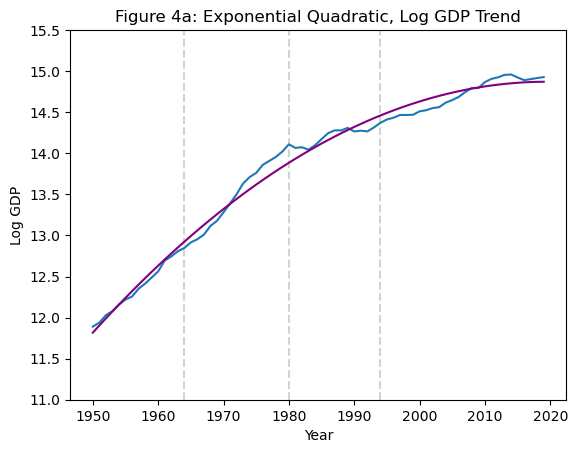

In [161]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_quad, color = 'purple')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP")

#formatting
plt.title("Figure 4a: Exponential Quadratic, Log GDP Trend")
plt.ylim(11,15.5)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 4a.png", dpi=300, bbox_inches='tight')

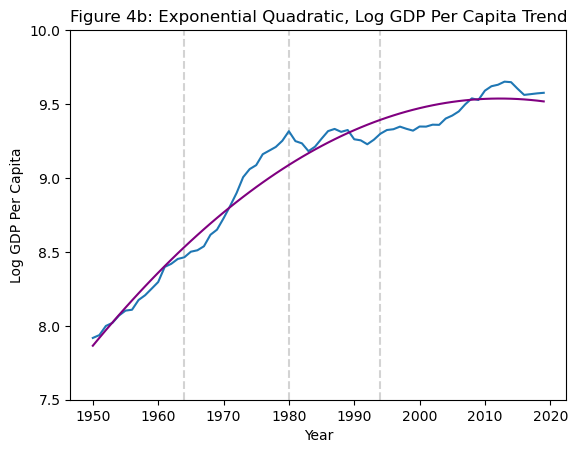

In [162]:
a_exp_quadpc, b_exp_quadpc, c_exp_quadpc = get_regression_coefs(ypc, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quadpc[t] = a_exp_quadpc + b_exp_quadpc * (t + 1) + c_exp_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# No need to convert into log-units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_quadpc, color = 'purple')

#labels
plt.xlabel("Year")
plt.ylabel("Log GDP Per Capita")

#formatting
plt.title("Figure 4b: Exponential Quadratic, Log GDP Per Capita Trend")
plt.ylim(7.5,10)
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 4b.png", dpi=300, bbox_inches='tight')

# 2. Extracting TFP

We use the production function $Y = AK^\alpha(HL)^{1-\alpha}$
* A is TFP
* K is capital stock
* H is human capital index
* L is annual hours worked in the economy.
* L = average annual hours worked by an employed worker x number of employed workers
* We set **alpha = 0.5**

Therefore,
 $$TFP = A=Y/{K^{\alpha}(HL)^{1-\alpha}}$$

First, we create a dataframe containing Brazil's GDP, factors, and TFP for every eyar.

In [163]:
alpha = 0.5

#Get relevant variables for Brazil
data_tfp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna", "rnna", "rtfpna", "hc", "emp", "avh", "csh_i", "delta")]

#Labour = employment * average hours worked
data_tfp["labour"] = data_tfp["emp"]*data_tfp["avh"]

data.index = data['year']

#Extract TFP using the above equation
data_tfp["tfp"] = data_tfp["rgdpna"] / (data_tfp["rnna"]**alpha*(data_tfp["hc"]*data_tfp["labour"])**(1-alpha))
    

Then we plot TFP over time, comparing it to the TFP values given in the Penn World Table.

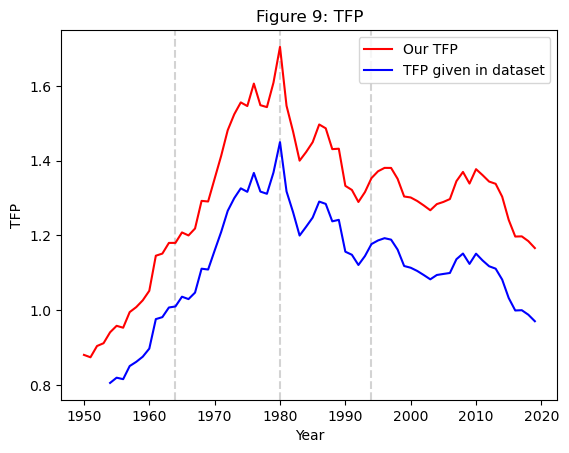

In [164]:
plt.figure()
plt.plot(data_tfp["year"], data_tfp["tfp"], color = "red", label = "Our TFP")
plt.plot(data_tfp["year"], data_tfp["rtfpna"], color = "blue", label = "TFP given in dataset") #plotting the tfp values given in dataset for reference

plt.legend(loc="upper right", fontsize=10)

plt.xlabel("Year")
plt.ylabel("TFP")
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.title("Figure 9: TFP")
plt.savefig("../figures/Figure 9.png", dpi=300, bbox_inches='tight')

# 3. Growth Accounting

$$g_Y = g_A + \alpha g_K + (1-\alpha)g_H + (1-\alpha)g_L$$

Growth accounting equations:

$$
\begin{aligned}
\text{contr\_A} = \frac{g_A}{g_Y} \\
\text{contr\_K} = \alpha \cdot \frac{g_K}{g_Y} \\
\text{contr\_H} = (1-\alpha) \cdot \frac{g_H}{g_Y} \\
\text {contr\_L} = (1-\alpha) \cdot \frac{g_L}{g_Y}
\end{aligned}
$$

Calculating the growth rates using log:

In [165]:
#def function to calculate growth rates
def compute_growth_rate(X):
    Y = X.to_numpy() #changing the data to numpy array
    return np.log(Y[1:] / Y[:-1])

gY = compute_growth_rate(data_tfp["rgdpna"])
gA = compute_growth_rate(data_tfp["tfp"])
gK = compute_growth_rate(data_tfp["rnna"])
gH = compute_growth_rate(data_tfp["hc"])
gL = compute_growth_rate(data_tfp["labour"])

contr_A =  gA / gY
contr_K = alpha * gK / gY
contr_H = (1-alpha) * gH / gY
contr_L = (1- alpha) * gL / gY

In [166]:
# Compute yearly intervals of the form "2000-2001"
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp["year"][:-1], data_tfp["year"][1:])])

# Fill in the dataframe
df_contr = pd.DataFrame(
    data = np.hstack((intvls[:, None], contr_K[:, None], contr_L[:, None], contr_H[:, None], contr_A[:, None], gY[:, None])),
    columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y growth rate']
)

# Specify the data types for specific columns (it would be more efficient to define dataypes already before creating dataframe)
df_contr = df_contr.astype({
    'year': 'object',
    'K contribution': 'float64',
    'L contribution': 'float64',
    'H contribution': 'float64',
    'A contribution': 'float64',
    'Y growth rate' : 'float64'})

# Set index
df_contr = df_contr.set_index('year')

# Set display options
pd.set_option('display.float_format', '{:.4f}'.format)

In [167]:
# create dataframe of log values
ln_data_tfp= data_tfp.drop(columns='year').apply(np.log)
ln_data_tfp['year'] = data_tfp['year']

In [168]:
# Compute yearly intervals of the form "2000-2010"
dec_intvls = np.array(["1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2019"])


# dec_change is the difference in logs of the variables within each decade
# First row is NaN, second row is the difference between 1950 and 1960, so we delete first row
dec_change = ln_data_tfp[ln_data_tfp["year"].isin([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2019])][["rgdpna", "tfp", "rnna", "hc", "labour"]].diff().iloc[1:,:].reset_index(drop=True)


# Multiply log changes of each variable by different scalars according to the production function to obtain their growth contributions
mul_dict={"tfp":1, "rnna":alpha, "hc":(1-alpha), "labour":(1-alpha)}


# dec_contr is the growth contribution of each variable in each decade
# rearrange the columns the way we want them
dec_contr = dec_change.drop(columns = "rgdpna").mul(mul_dict).divide(dec_change["rgdpna"], axis=0).reindex(columns = ["rnna", "labour", "hc", "tfp"])


In [169]:
data_tfp.iloc[-10:,:]

,year,rgdpna,rnna,rtfpna,hc,emp,avh,csh_i,delta,labour,tfp
1740,2010,2862790.7500,11482913.0000,1.1513,2.4734,86.3538,1761.3457,0.2531,0.0489,152098.9485,1.3774
1741,2011,2976570.0000,11900607.0000,1.1331,2.5609,88.6289,1769.6214,0.2641,0.0498,156839.6478,1.3615
1742,2012,3033755.2500,12295923.0000,1.1177,2.6219,89.5063,1765.1022,0.2521,0.0503,157987.7140,1.3443
1743,2013,3124914.2500,12723252.0000,1.1112,2.6843,91.1482,1751.5538,0.2494,0.0507,159650.9618,1.3383
1744,2014,3140662.2500,13080525.0000,1.0819,2.7482,92.8336,1738.8689,0.2314,0.0508,161425.4364,1.3038
1745,2015,3029301.7500,13283081.0000,1.0326,2.8137,92.4472,1722.8758,0.1950,0.0504,159275.0915,1.2416
1746,2016,2930064.5000,13382091.0000,0.9993,2.8807,90.6265,1714.6750,0.1695,0.0495,155394.9492,1.1972
1747,2017,2968825.5000,13467872.0000,1.0000,2.9492,90.5014,1709.5944,0.1697,0.0487,154720.6626,1.1976
1748,2018,3007931.5000,13584285.0000,0.9880,3.0195,92.0909,1706.0572,0.1684,0.0482,157112.4125,1.1849
1749,2019,3042119.0000,13716485.0000,0.9705,3.0914,93.9568,1707.7951,0.1715,0.0478,160459.0018,1.1663


In [170]:
dec_change

,rgdpna,tfp,rnna,hc,labour
0,0.6719,0.1780,0.5882,0.0710,0.3285
1,0.7194,0.2510,0.5966,0.0805,0.2595
2,0.8277,0.2316,0.8939,-0.0211,0.3195
3,0.1562,-0.2460,0.3593,0.1473,0.2979
4,0.2458,-0.0236,0.2857,0.1751,0.0781
5,0.3558,0.0565,0.2139,0.1901,0.1945
6,0.0608,-0.1664,0.1777,0.2230,0.0535


In [171]:

# Annualize Y growth rate by dividing the decade growth rate by 10 for the first 6 decades and by 9 for 2010-2019
dec_to_annual_Y = pd.concat([dec_change["rgdpna"].iloc[:-1]/10, dec_change.loc[6,["rgdpna"]]/9], ignore_index=True)

In [172]:

# Put together the dataframe of the growth contributions of each factor and the annual growth rate of Y
df_dec_contr = pd.DataFrame(data = np.hstack((dec_intvls[:, None], 
                                           dec_contr.to_numpy(), 
                                           dec_to_annual_Y.to_numpy()[:, None])),
                            columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y annual growth rate'])

# Set index
df_dec_contr = df_dec_contr.set_index('year')

# Specify data type as float64
df_dec_contr = df_dec_contr.astype("float64")

print(df_dec_contr)

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1960          0.4377          0.2445          0.0528          0.2649   
1960-1970          0.4147          0.1804          0.0560          0.3490   
1970-1980          0.5400          0.1930         -0.0128          0.2798   
1980-1990          1.1499          0.9535          0.4715         -1.5750   
1990-2000          0.5810          0.1589          0.3561         -0.0960   
2000-2010          0.3006          0.2733          0.2672          0.1589   
2010-2019          1.4627          0.4403          1.8355         -2.7385   

           Y annual growth rate  
year                             
1950-1960                0.0672  
1960-1970                0.0719  
1970-1980                0.0828  
1980-1990                0.0156  
1990-2000                0.0246  
2000-2010                0.0356  
2010-2019                0.0068  


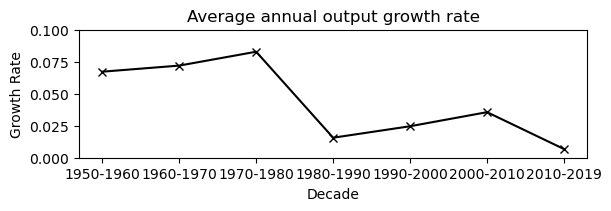

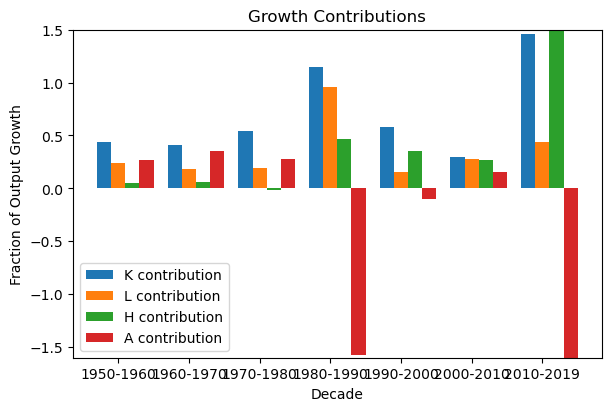

In [173]:

# Plot average annual output growth rate
# Set up label locations
x = np.arange(len(dec_intvls))

fig, ax1 = plt.subplots(layout='constrained', figsize=(6, 2))
ax1.set_title('Average annual output growth rate')
ax1.plot(x, df_dec_contr["Y annual growth rate"], color='black', marker='x', label='Y growth rate')
ax1.set_ylabel('Growth Rate')
ax1.set_xlabel('Decade')
ax1.set_xticks(x, dec_intvls)
ax1.set_ylim(0, 0.1)


# Plot growth contributions as a bar chart

# Set the width of the bars
width = 0.2 
# Set the offset of the bars
multiplier = 0

fig, ax2 = plt.subplots(layout='constrained', figsize=(6, 4))

# Plot bars for each factor in df_dec_contr
for factor, contr in df_dec_contr.drop(columns = "Y annual growth rate").to_dict("list").items():
# offset bars so they don't overlap
    offset = width * multiplier
    rects = ax2.bar(x + offset, contr, width, label=factor)
# offset future bars more every time we add a new bar
    multiplier += 1

# Add labels, title, custom x-axis tick labels, legend, and set min and max y-axis values
ax2.set_title('Growth Contributions')
ax2.set_ylabel('Fraction of Output Growth')
ax2.set_xticks(x + width, dec_intvls)
ax2.legend(loc='lower left', ncols=1)
ax2.set_ylim(-1.6, 1.5)
ax2.set_xlabel('Decade')

plt.show()

## Splitting by 1950-1964, 1964-1980, 1980-1994, 1994-2019

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1964          0.4182          0.2230          0.0527          0.3061   
1964-1980          0.5065          0.1905          0.0117          0.2914   
1980-1994          0.9008          0.5764          0.4057         -0.8829   
1994-2019          0.5077          0.2897          0.4697         -0.2672   

           Y annual growth rate  
year                             
1950-1964                0.0684  
1964-1980                0.0789  
1980-1994                0.0187  
1994-2019                0.0223  


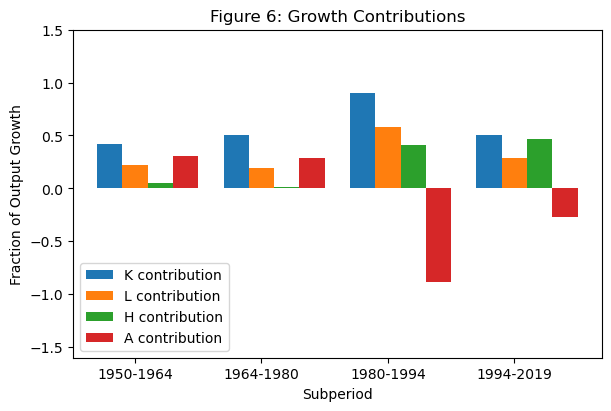

In [174]:

# Compute yearly intervals of the form "1950-1964"
period_intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip([1950,1964,1980,1994,2019][:-1], [1950,1964,1980,1994,2019][1:])])

period_change = ln_data_tfp[ln_data_tfp["year"].isin([1950,1964,1980,1994,2019])][["rgdpna", "tfp", "rnna", "hc", "labour"]].diff().iloc[1:,:]


# Multiply log changes of each variable by different scalars according to the production function to obtain their growth contributions
mul_dict={"tfp":1, "rnna":alpha, "hc":(1-alpha), "labour":(1-alpha)}


# period_contr is the growth contribution of each variable in each period
# rearrange the columns the way we want them
period_contr = period_change.drop(columns = "rgdpna").mul(mul_dict).divide(period_change["rgdpna"], axis=0).reindex(columns = ["rnna", "labour", "hc", "tfp"])

# Annualize Y growth rate
period_to_annual_Y = np.array([rate/years for rate, years in zip(period_change["rgdpna"], [1964-1950, 1980-1964, 1994-1980, 2019-1994])])


# Put together the dataframe of the contribution of each factor to growth
df_period_contr = pd.DataFrame(data = np.hstack((period_intvls[:, None], 
                                           period_contr.to_numpy(), 
                                           period_to_annual_Y[:, None])),
                            columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y annual growth rate'])

# Set index
df_period_contr = df_period_contr.set_index('year')

# Specify data type as float64
df_period_contr = df_period_contr.astype("float64")

print(df_period_contr)

# Plot average annual output growth rate
# Set up label locations
x = np.arange(len(period_intvls))

fig, ax1 = plt.subplots(layout='constrained', figsize=(6, 2))
ax1.set_title('Figure 5: Average annual output growth rate')
ax1.plot(x, df_period_contr["Y annual growth rate"], color='black', marker='x', label='Y growth rate')
ax1.set_xticks(x, period_intvls)
ax1.set_xlabel('Subperiod')
ax1.set_ylim(0, 0.09)

plt.savefig("../figures/Figure 5.png", dpi=300, bbox_inches='tight')
plt.close(fig)

# Plot growth contributions as a bar chart

# Set the width of the bars
width = 0.2 
# Set the offset of the bars
multiplier = 0

fig, ax2 = plt.subplots(layout='constrained', figsize=(6, 4))

# Plot bars for each factor in df_dec_contr
for factor, contr in df_period_contr.drop(columns = "Y annual growth rate").to_dict("list").items():
# offset bars so they don't overlap
    offset = width * multiplier
    rects = ax2.bar(x + offset, contr, width, label=factor)
# offset future bars more every time we add a new bar
    multiplier += 1

# Add labels, title, custom x-axis tick labels, legend, and set min and max y-axis values
ax2.set_title('Figure 6: Growth Contributions')
ax2.set_xlabel('Subperiod')
ax2.set_ylabel('Fraction of Output Growth')
ax2.set_xticks(x + width, period_intvls)
ax2.legend(loc='lower left', ncols=1)
ax2.set_ylim(-1.6, 1.5)

# Save the figure
plt.savefig("../figures/Figure 6.png", dpi=300, bbox_inches='tight')

It is convenient to look at a chart of not the growth contributions, but the actual annualised percentage changes of each factor, so we create one.

           Y annual growth rate  K annual growth rate  L annual growth rate  \
year                                                                          
1950-1964                0.0684                0.0572                0.0305   
1964-1980                0.0789                0.0799                0.0300   
1980-1994                0.0187                0.0336                0.0215   
1994-2019                0.0223                0.0226                0.0129   

           H annual growth rate  A annual growth rate  
year                                                   
1950-1964                0.0072                0.0209  
1964-1980                0.0018                0.0230  
1980-1994                0.0151               -0.0165  
1994-2019                0.0209               -0.0060  


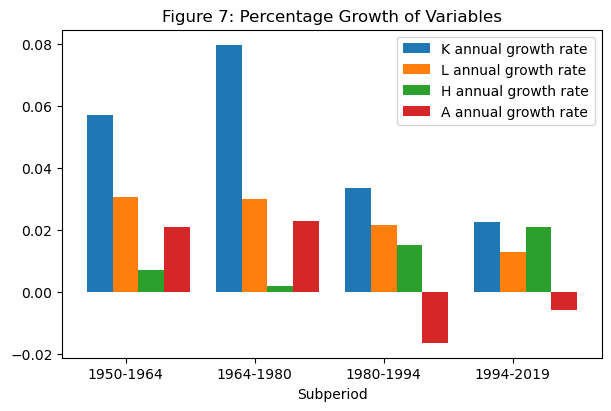

In [175]:
# Create dataframe of annual growth rates by dividing each row of period_change by the number of years in the subperiod
period_annual_change_prep = pd.concat([period_change.iloc[0:1]*(1/14), period_change.iloc[1:2]*(1/16), period_change.iloc[2:3]*(1/14), period_change.iloc[3:4]*(1/25)], axis = 0)

# Our proper dataframe of annual growth rates will be called period_annual_change
# First add the annual growth rate of Y to the dataframe
period_annual_change = period_annual_change_prep['rgdpna'].to_frame().rename(columns = {'rgdpna':'Y annual growth rate'})

# Then add the annual growth rates of the factors to the dataframe
period_annual_change['K annual growth rate'] = period_annual_change_prep['rnna']
period_annual_change['L annual growth rate'] = period_annual_change_prep['labour']
period_annual_change['H annual growth rate'] = period_annual_change_prep['hc']
period_annual_change['A annual growth rate'] = period_annual_change_prep['tfp']
period_annual_change['year'] = period_intvls

# Set the periods (e.g. 1950-1964) as the index
period_annual_change = period_annual_change.set_index('year')

print(period_annual_change)

# Plot percentage growth of each factor as a bar chart

# Set the width of the bars
width = 0.2
# Set the offset of the bars
multiplier = 0

fig, ax2 = plt.subplots(layout='constrained', figsize=(6, 4))

# Plot bars for each factor in period_annual_change
for factor, change in period_annual_change.drop(columns = "Y annual growth rate").to_dict("list").items():
# offset bars so they don't overlap
    offset = width * multiplier
    rects = ax2.bar(x + offset, change, width, label=factor)
# offset future bars more every time we add a new bar
    multiplier += 1

# Add labels, title, custom x-axis tick labels, and legend
ax2.set_title('Figure 7: Percentage Growth of Variables')
ax2.set_xticks(x + width, period_intvls)
ax2.set_xlabel('Subperiod')
ax2.legend(ncols=1)

plt.savefig("../figures/Figure 7.png", dpi=300, bbox_inches='tight')

# Solow model

Investment share of output from 1950 to 2019:

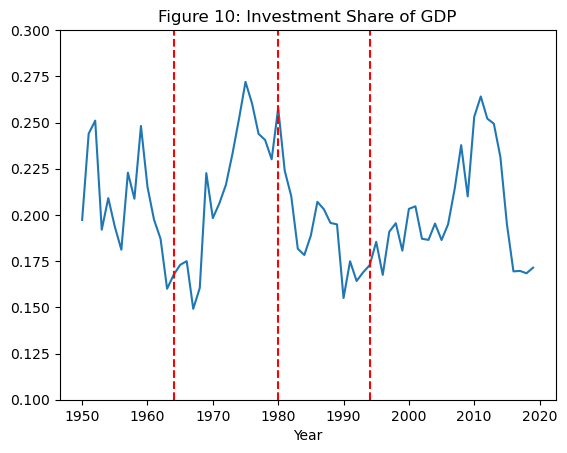

<Figure size 640x480 with 0 Axes>

In [176]:
# Plot investment share of GDP

plt.figure()
plt.plot(data_tfp['year'], data_tfp['csh_i'])

# Set y-axis to be the [0, 0.3] interval
plt.ylim(0.1, 0.3)
plt.title("Figure 10: Investment Share of GDP")


# Add lines indicating the sectioning of periods
plt.axvline(x=1964, color = 'red', linestyle = 'dashed')
plt.axvline(x=1980, color = 'red', linestyle = 'dashed')
plt.axvline(x=1994, color = 'red', linestyle = 'dashed')
plt.xlabel("Year")

plt.show()

plt.savefig("../figures/Figure 10.png", dpi=300, bbox_inches='tight')

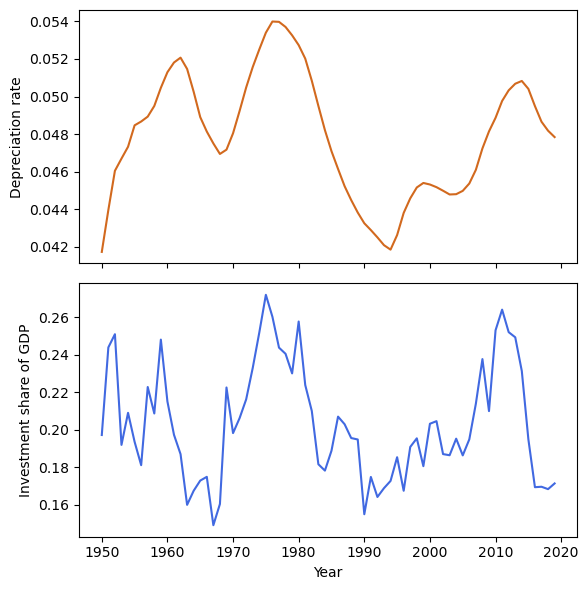

<Figure size 640x480 with 0 Axes>

In [177]:
# Plot depreciation rate and investment share of GDP in two subplots

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

# First subplot for depreciation rate
ax[0].plot(range(1950, 2020), data_tfp["delta"], color="chocolate")
ax[0].set_ylabel("Depreciation rate")

# Second subplot for investment share of GDP
ax[1].plot(range(1950, 2020), data_tfp["csh_i"], color="royalblue")
ax[1].set_ylabel("Investment share of GDP")
ax[1].set_xlabel("Year")

plt.tight_layout()
plt.show()

plt.savefig("../figures/Figure 11.png", dpi=300, bbox_inches='tight')

# 4. Labour Productivity

In [178]:
#subset of brazil's year, real gdp, and population data
data_lp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna","emp")]
data_lp["lp"] = data_lp["rgdpna"] / data_lp["emp"]

# Reset the index
data_lp = data_lp.reset_index(drop = True)

Plotting labour productivity over time:

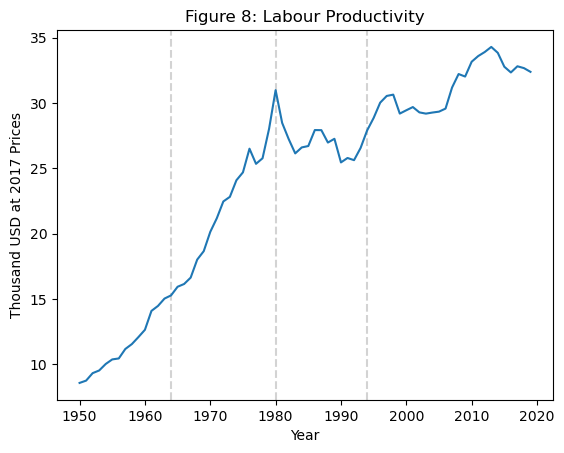

In [179]:
#plotting labour productivity
plt.figure()
plt.plot(data_lp['year'],data_lp['lp']/1000) #show gdp per worker in thousands

#labels
plt.xlabel("Year")
plt.ylabel("Thousand USD at 2017 Prices")

#title
plt.title("Figure 8: Labour Productivity")
plt.axvline(x=1964, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1980, color = "lightgrey", linestyle = 'dashed', zorder = 1)
plt.axvline(x=1994, color = "lightgrey", linestyle = 'dashed', zorder = 1)

plt.savefig("../figures/Figure 8.png", dpi=300, bbox_inches='tight')

# Extra analysis

Plotting yearly growth rates of factors:

Text(0.5, 1.0, 'Labour Growth')

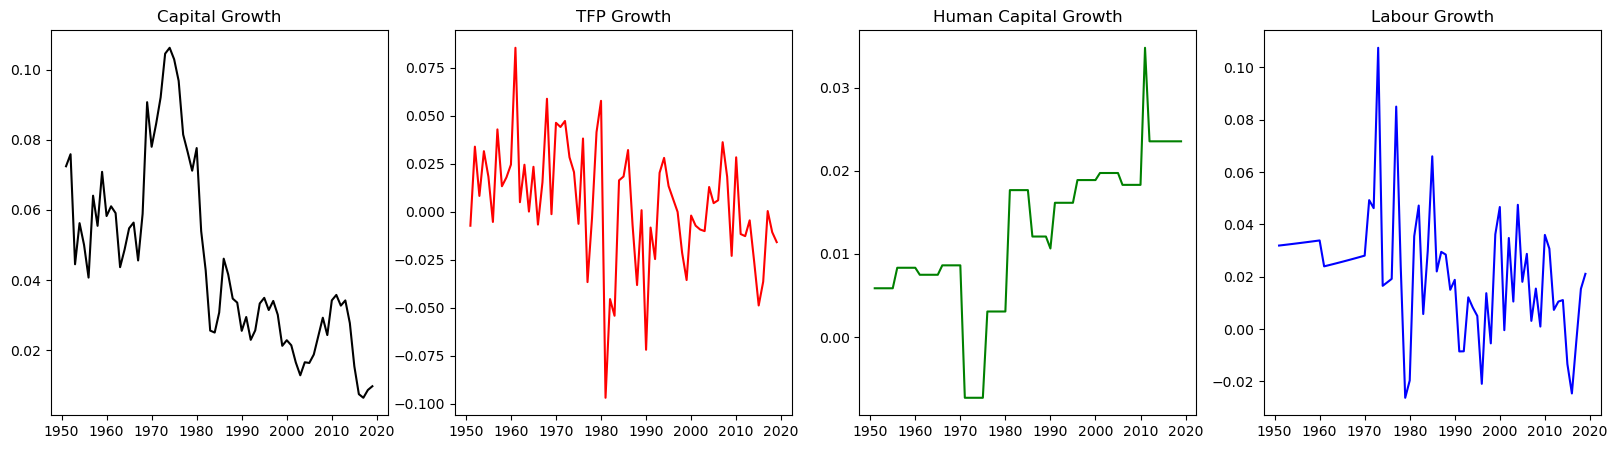

In [180]:
gK_year = pd.Series(np.insert(gK, 0, np.nan), index=data_tfp['year'])
gA_year = pd.Series(np.insert(gA, 0, np.nan), index=data_tfp['year'])
gH_year = pd.Series(np.insert(gH, 0, np.nan), index=data_tfp['year'])
gL_year = pd.Series(np.insert(gL, 0, np.nan), index=data_tfp['year'])

f, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=[20,5])
ax1.plot(gK_year.index, gK_year.values, color = 'black')
ax1.set_title('Capital Growth')
ax2.plot(gA_year.index, gA_year.values, color = 'red')
ax2.set_title('TFP Growth')
ax3.plot(gH_year.index, gH_year.values, color = 'green')
ax3.set_title('Human Capital Growth')
ax4.plot(gL_year.index, gL_year.values, color = 'blue')
ax4.set_title('Labour Growth')


In [181]:
factor_growth = pd.DataFrame(np.column_stack((gK_year,gL_year,gH_year,gA_year)), columns = ['K','L','H','A'], index=data_tfp['year'])

In [182]:
#Get mean growth rates for subperiods
BINS = [1950, 1980, 1994, 2020]

factor_growth['subperiod'] = pd.cut(factor_growth.index, bins = BINS, right = False)
factor_growth.groupby(by = ['subperiod']).mean()

/var/folders/g4/8ft2rrv13nb5qxqxxmh622pc0000gn/T/ipykernel_63107/2257575482.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  factor_growth.groupby(by = ['subperiod']).mean()


,K,L,H,A
subperiod,,,,
"[1950, 1980)",0.0690,0.0320,0.0044,0.0208
"[1980, 1994)",0.0368,0.0195,0.0142,-0.0143
"[1994, 2020)",0.0231,0.0127,0.0208,-0.0046
